In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io
import requests

In [2]:
#DatasetPath
url="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
path=requests.get(url).content
dataset=pd.read_csv(io.StringIO(path.decode('utf-8')))

In [3]:
dataset.head()

Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30

## Data Visualization

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
dataset.describe()

Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000

Text(0.5, 1.0, 'Study Hours VS study Scores')

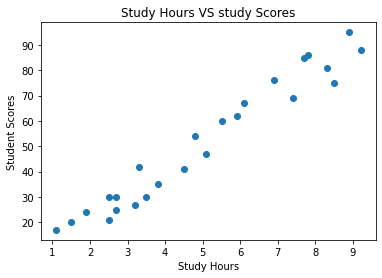

In [6]:
plt.scatter(x=dataset.Hours , y=dataset.Scores)
plt.xlabel("Study Hours")
plt.ylabel("Student Scores")
plt.title("Study Hours VS study Scores")

## Prepare The Dataset For Machine Learning Alogirthm

In [7]:
#Data Cleaning
dataset.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [8]:
#Split the Dataset into Dependent feature and Independent Feature
X = dataset.iloc[: , :1]
Y = dataset.drop("Hours" , axis="columns")

In [9]:
X.head()

Hours
0    2.5
1    5.1
2    3.2
3    8.5
4    3.5

In [10]:
Y.head()

Scores
0      21
1      47
2      27
3      75
4      30

In [11]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X, Y, test_size = 0.2)
 #test-size is defining that how much data we used for test our model 0.3 means we used 30% dataset for model testing

## Model Selection and Model Training

In [12]:
X_train.head()

Hours
14    1.1
19    7.4
0     2.5
11    5.9
17    1.9

In [13]:
X_test.shape

(5, 1)

In [14]:
from sklearn.linear_model import LinearRegression
objectLiner = LinearRegression()

In [15]:
objectLiner.fit(X_train , Y_train)

LinearRegression()

In [16]:
objectLiner.coef_

array([[9.72573387]])

In [17]:
Y_predict = objectLiner.predict(X_test)

In [18]:
Y_predict

array([[29.19463255],
       [39.8929398 ],
       [17.52375191],
       [36.97521964],
       [56.42668738]])

# Merge Y_test and Y_predict

In [19]:
pd.DataFrame(np.c_[X_test , Y_test , Y_predict] , columns= ["Study Hours" , "Orignal Scores" , "Predicted Scores"])

Study Hours  Orignal Scores  Predicted Scores
0          2.7            30.0         29.194633
1          3.8            35.0         39.892940
2          1.5            20.0         17.523752
3          3.5            30.0         36.975220
4          5.5            60.0         56.426687

In [20]:
objectLiner.score(X_test , Y_predict)

1.0

In [21]:
import joblib
joblib.dump(objectLiner , "student_Score_predictor.pkl")

['student_Score_predictor.pkl']

In [22]:
model = joblib.load("student_Score_predictor.pkl")

In [23]:
model.predict([[9.25]])

array([[92.89818938]])